In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/Applications/Repos/Repo/expedition/Python/Linear/linear_house.csv')

In [ ]:
df.head()

In [ ]:
%matplotlib inline


In [ ]:
plt.scatter(df['area'],df['price'],color='red',marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

Create a regression object

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df['price'])

In [ ]:
reg.predict([[3300]])

In [ ]:
print('Coef',reg.coef_)
print('Intercept',reg.intercept_)

Y = mx + b

In [ ]:
135.78767123*3300 + 180616.43835616432

In [ ]:
reg.predict([[5000]])

In [ ]:
d = pd.read_csv('/Applications/Repos/Repo/expedition/Python/Linear/linear_areas.csv')

In [ ]:
d

In [ ]:
p = reg.predict(d)

In [ ]:
d['Price'] = p

In [ ]:
d.head(10)

In [ ]:
plt.scatter(df['area'],df['price'],color='red',marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')
plt.show()

Linear Regression with multiple features


In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv('/Applications/Repos/Repo/expedition/Python/Linear/linear_multiple.csv')
df.head(10)

In [ ]:
df.bedroom.median()

Make median a whole number as rooms can not be in float

In [ ]:
import math
median_bedroom = math.floor(df.bedroom.median())
median_bedroom

In [ ]:
df['bedroom'] = df['bedroom'].fillna(median_bedroom)

In [ ]:
df

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedroom','age']],df.price)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
reg.predict([[3000,3,40]])

In [ ]:
137.25*3000 + -26025*3 + -6825*40 + 383725.0

In [ ]:
reg.predict([[2500,4,5]])

Salary predictions


In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [58]:
df = pd.read_csv('/Applications/Repos/Repo/expedition/Python/Linear/linear_multiple(salary).csv')

In [62]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


map the coloum values

In [59]:
word_to_num = {'one':1,'two':2,'three':3,
               'four':4,'five':5,'six':6,
               'seven':7,'eight':8,'nine':9,
               'ten':10,'eleven':11}


In [60]:
df['experience'] = df['experience'].map(word_to_num)

In [63]:
df.test_score.mean()

7.857142857142857

In [64]:
df['experience'] = df['experience'].fillna(0)

In [65]:
df

,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [66]:
mean_score = math.floor(df.test_score.mean())

In [67]:
df.test_score = df.test_score.fillna(mean_score)

In [68]:
df

,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [70]:
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [71]:
reg.fit(df[['experience','test_score','interview_score']],df.salary)

LinearRegression()

In [72]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [73]:
reg.intercept_

14992.65144669314

Salary for

2 year , 9 test , 9 interview

In [74]:
reg.predict([[2,9,9]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60156.31447034])

In [75]:
2922.26901502*2 + 2221.30909959*9 + 2147.48256637*9 +14992.65144669314

60156.31447037314

Salary for

12 year , 10 test , 10 interview

In [76]:
reg.predict([[12,10,10]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

In [77]:
%matplotlib inline

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

Regression: Let's use experience vs salary

In [91]:
X = df[['experience']]
Y = df['salary']

reg.fit(X,Y)



LinearRegression()

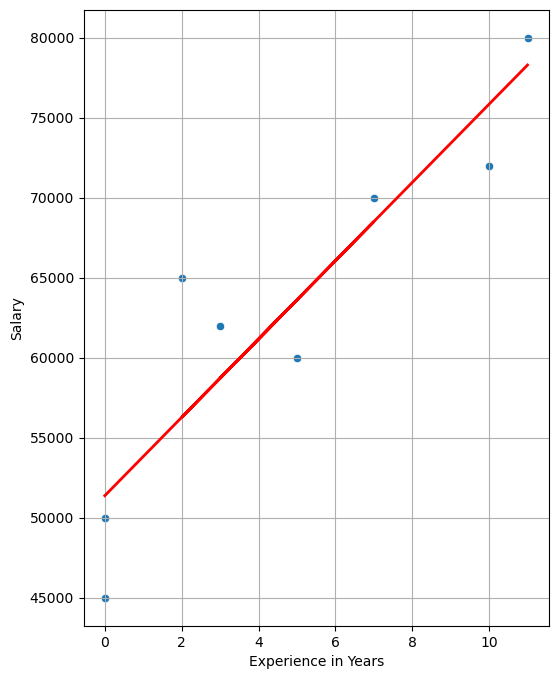

In [103]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='experience',y='salary',data=df)
plt.xlabel('Experience in Years')
plt.ylabel('Salary')
plt.plot(df['experience'],reg.predict(X),color='red',linewidth=2,label='Best fit line')
plt.grid(True)
plt.tight_layout
plt.show()